In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import ta
import seaborn as sns
import random

In [2]:
stock_df = pd.read_csv(filepath_or_buffer="C:/Users/limxu/OneDrive/Documents/UCB/SAAS/Project/data/stock_df_full.csv", index_col=0)
stock_df = stock_df.set_index('date')
print(stock_df.head(10))

             open   high    low  close   volume    change  minus1_change  \
date                                                                       
2011-07-21  18.15  19.06  17.96  18.76   892900  5.393258       3.308183   
2011-07-22  18.60  18.60  17.85  18.03   554500 -3.891258       5.393258   
2011-07-25  18.75  18.75  17.50  17.81  1069500 -1.220189      -3.891258   
2011-07-26  18.00  18.13  17.20  17.28   834200 -2.975856      -1.220189   
2011-07-27  17.20  17.25  16.50  16.62   532800 -3.819444      -2.975856   
2011-07-28  16.58  16.85  15.88  16.18   980000 -2.647413      -3.819444   
2011-07-29  15.95  15.97  14.68  15.09  2522600 -6.736712      -2.647413   
2011-08-01  16.43  16.70  13.70  14.32  3148600 -5.102717      -6.736712   
2011-08-02  14.30  14.37  13.51  13.96  1442700 -2.513966      -5.102717   
2011-08-03  14.13  14.13  13.00  13.41  1929300 -3.939828      -2.513966   

            minus2_change  minus3_change  plus1_change  plus1_open  \
date             

## Functions:

In [3]:
def reduceWindow(n, stock_df):
    last_index = len(stock_df)-1
    rand = random.randint(0,last_index-n)
    print("random index is ", rand) 

    #Reduce the size of the df to n
    plot_df = stock_df.iloc[rand:rand+n]

    return plot_df

## Part 1: Choosing what variable to predict

In [4]:
plot_df = reduceWindow(730, stock_df)

random index is  532


In [5]:
plot_df = stock_df

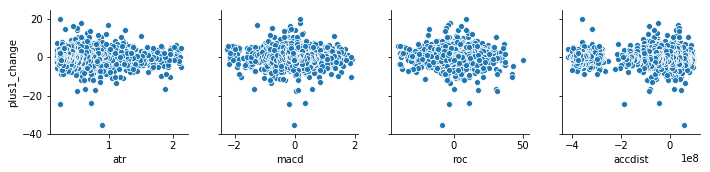

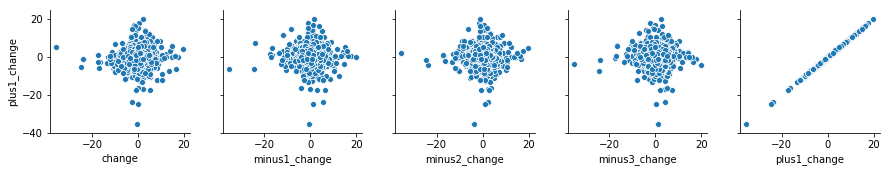

In [8]:
#If y = plus1change
sns.pairplot(data=plot_df, y_vars=['plus1_change'], x_vars=['atr','macd','roc','accdist'])
sns.pairplot(data=plot_df, y_vars=['plus1_change'], x_vars=['change', 'minus1_change', 'minus2_change', 'minus3_change', 'plus1_change'])

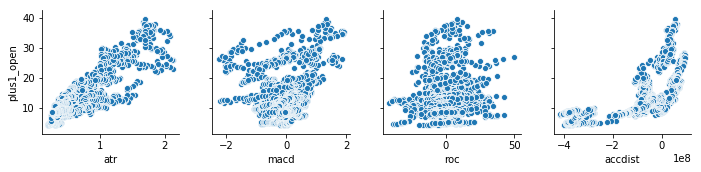

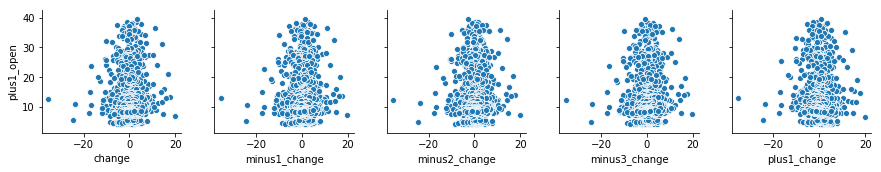

In [7]:
#If y = open
sns.pairplot(data=plot_df, y_vars=['plus1_open'], x_vars=['atr','macd','roc','accdist'])
sns.pairplot(data=plot_df, y_vars=['plus1_open'], x_vars=['change', 'minus1_change', 'minus2_change', 'minus3_change', 'plus1_change'])

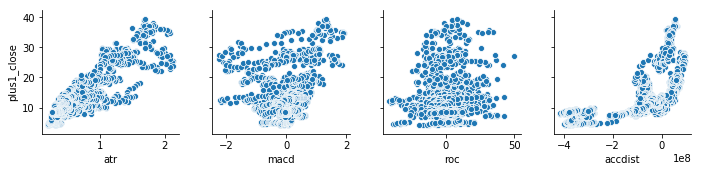

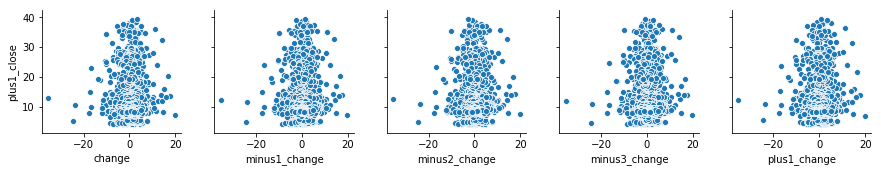

In [6]:
#If y = open
sns.pairplot(data=plot_df, y_vars=['plus1_close'], x_vars=['atr','macd','roc','accdist'])
sns.pairplot(data=plot_df, y_vars=['plus1_close'], x_vars=['change', 'minus1_change', 'minus2_change', 'minus3_change', 'plus1_change'])

### Part 1 conclusion:

- Seems like open/close has an interesting correlation with accdist and atr.
- Surprisingly, the correlation with minusx_change is low...

## Part 2: Identifying correlations

In [4]:
plot_df = stock_df.drop(columns=['open','high','low','close'])
plot_df.corr()

,volume,change,prevday_change,atr,macd,accdist,roc
volume,1.000000,-0.063279,-0.027559,0.022030,-0.023928,-0.165530,-0.011431
change,-0.063279,1.000000,0.033635,-0.032273,0.054869,-0.005740,0.290939
prevday_change,-0.027559,0.033635,1.000000,-0.028718,0.105151,-0.003101,0.303995
atr,0.022030,-0.032273,-0.028718,1.000000,-0.047257,0.597815,-0.060834
macd,-0.023928,0.054869,0.105151,-0.047257,1.000000,-0.017409,0.580298
accdist,-0.165530,-0.005740,-0.003101,0.597815,-0.017409,1.000000,-0.008269
roc,-0.011431,0.290939,0.303995,-0.060834,0.580298,-0.008269,1.000000


### Reducing the window for comparison

In [34]:
plot_df = stock_df.drop(columns=['open','high','low','close'])
max_window_plot = plot_df.corr()

In [36]:
#Check if there is a higher correlation when i lessen the window of comparison

plot_df = reduceWindow(365, stock_df)
# sns.pairplot(data=plot_df, y_vars=['change'], x_vars=['atr','macd','roc','accdist','change'])
plot_df = plot_df.drop(columns=['open','high','low','close'])

#Compare the difference in correlation values of small window and big window
small_window_plot = plot_df.corr()
print(small_window_plot)
compare_plot = small_window_plot.abs() - max_window_plot.abs()
print(compare_plot)

random index is  384
                 volume    change  minus1_change  minus2_change  \
volume         1.000000  0.013999       0.033946       0.045244   
change         0.013999  1.000000       0.043035      -0.034014   
minus1_change  0.033946  0.043035       1.000000       0.054913   
minus2_change  0.045244 -0.034014       0.054913       1.000000   
minus3_change  0.025694 -0.062635      -0.042123       0.052635   
plus1_change  -0.032253  0.047653      -0.043302      -0.057151   
atr            0.366763 -0.084221      -0.084842      -0.076164   
macd          -0.109010  0.045447       0.101819       0.137910   
accdist        0.075602 -0.017742      -0.011679      -0.014916   
roc            0.115190  0.286950       0.293227       0.298976   

               minus3_change  plus1_change       atr      macd   accdist  \
volume              0.025694     -0.032253  0.366763 -0.109010  0.075602   
change             -0.062635      0.047653 -0.084221  0.045447 -0.017742   
minus1_change

### Part 2 conclusion:

- Seems like reducing the window generally increases correaltion between variables.. But that is not what we want.. hmm...

Comparing 1920, 365, and 100, seems like 100 shows the highest correlation

What i am looking for:
- Stronger correlation between independent and dependent variables
- Weaker correlations between independent variables (so when combined, could have stronger explanatory power)